In [59]:
#Librerias de Bokeh

import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms import community
import pandas as pd
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, CustomJS, Slider, Column
from bokeh.models import GraphRenderer, StaticLayoutProvider
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4
from bokeh.models import LabelSet
import matplotlib.pyplot as plt


In [60]:
#Datos

from google.colab import drive
drive.mount('/content/drive')

matriz = pd.read_csv('/content/drive/My Drive/br_1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#Preprocesamiento para obtener etiquetas y matriz de adjacencia

etiquetas = dict(matriz["Unnamed: 1"]) 
#etiquetas matriz adjacencia

matriz_1 = matriz.drop( columns=['Unnamed: 0']) #matriz sin columna ID
print(matriz_1)

matriz_adj = matriz_1.drop(columns='Unnamed: 1') #matriz adjacencia
matriz_adj = matriz_adj.to_numpy()

   Unnamed: 1   A   B   C   D   E   F   G  ...   S   T   U   V   W   X   Y   Z
0           A   0  41  30  53  88  68  29  ...  44  74  29  56  52  59  80  51
1           B  41   0  17  78  51  51  80  ...  66  54  19  80  19  72  50  51
2           C  30  17   0  14  26  53   9  ...   7  16  53  24  21  16  25   7
3           D  53  78  14   0  65  53  65  ...  79  73  16  82  23  89  68  71
4           E  88  51  26  65   0  69  36  ...  55  83  28  67  47  71  87  61
5           F  68  51  53  53  69   0  37  ...  45  57  44  63  38  58  66  46
6           G  29  80   9  65  36  37   0  ...  56  41  11  62  13  62  35  41
7           H   0   0   0   0   0   0   4  ...   0   0   0   0   0   0   0   0
8           I  55  75  17  88  67  57  60  ...  86  77  19  90  26  87  70  74
9           J  52  48   5  68  62  43  38  ...  75  78   6  60  16  67  70  92
10          K  49  65   8  80  60  48  55  ...  92  72   9  78  20  81  62  82
11          L  10  61   0  43  15  16  61  ...  40  

In [62]:
#Generador de grafo de matriz de adjacencia

Grafo_ = nx.from_numpy_matrix(matriz_adj)

print(nx.info(Grafo_))
print("Weighted edges: " + str(nx.is_weighted(Grafo_)))


Name: 
Type: Graph
Number of nodes: 27
Number of edges: 318
Average degree:  23.5556
Weighted edges: True


In [63]:
G= Grafo_

#Conversion de formato de informacion de grafo de NetworkX
nodos_grafo = list(G.nodes)
dict_aristas_grafo = dict(G.edges)

aristas_ = list(dict_aristas_grafo.keys()) #lista con tuplas (nodo init,nodo fin)
pesos_ = list(dict_aristas_grafo.values())

no_aristas = len(aristas_) #Numero de aristas en grafo

nodos_inicio = [] #lista con nodos donde inicia una arista
nodos_destino = [] #lista con nodos donde termina una arista
pesos_aristas = [] #lista peso de cada arista en el grafo

for i in range(len(aristas_)):
  ar = list(aristas_[i])
  pesos_aristas.append(pesos_[i]['weight']) 
  nodos_inicio.append(ar[0])
  nodos_destino.append(ar[1])

"""
Se crean dos listas, una con los nodos de inicio de cada arista
y otra con los nodos de destino de cada arista.

Esto con el fin de poder pasarlos como argumentos a la funcion
graph_.edge_renderer.data_source.data que requiere que se le pasen
dos columnas "start" y "end" que contengan los indice de cada nodo en 
cada arista
"""


'\nSe crean dos listas, una con los nodos de inicio de cada arista\ny otra con los nodos de destino de cada arista.\n\nEsto con el fin de poder pasarlos como argumentos a la funcion\ngraph_.edge_renderer.data_source.data que requiere que se le pasen\ndos columnas "start" y "end" que contengan los indice de cada nodo en \ncada arista\n'

Filtrado por Método de Codo

[41, 30, 53, 88, 68, 29, 55, 52, 49, 10, 49, 80, 3, 74, 83, 31, 77, 44, 74, 29, 56, 52, 59, 80, 51, 17, 78, 51, 51, 80, 75, 48, 65, 61, 25, 61, 5, 47, 55, 19, 30, 66, 54, 19, 80, 19, 72, 50, 51, 14, 26, 53, 9, 17, 5, 8, 75, 28, 31, 44, 23, 69, 23, 7, 16, 53, 24, 21, 16, 25, 7, 65, 53, 65, 88, 68, 80, 43, 24, 72, 2, 50, 67, 16, 40, 79, 73, 16, 82, 23, 89, 68, 71, 69, 36, 67, 62, 60, 15, 42, 85, 4, 71, 86, 27, 72, 55, 83, 28, 67, 47, 71, 87, 61, 37, 57, 43, 48, 16, 67, 74, 16, 82, 64, 53, 51, 45, 57, 44, 63, 38, 58, 66, 46, 4, 60, 38, 55, 61, 16, 47, 2, 33, 42, 11, 20, 56, 41, 11, 62, 13, 62, 35, 41, 69, 85, 39, 28, 72, 3, 53, 69, 19, 42, 86, 77, 19, 90, 26, 87, 70, 74, 77, 22, 15, 56, 41, 61, 7, 37, 75, 78, 6, 60, 16, 67, 70, 92, 39, 18, 66, 45, 63, 9, 36, 92, 72, 9, 78, 20, 81, 62, 82, 2, 26, 12, 22, 3, 40, 19, 42, 38, 14, 23, 45, 13, 67, 37, 54, 41, 16, 29, 43, 34, 37, 28, 39, 18, 3, 73, 81, 29, 63, 60, 72, 29, 75, 43, 78, 79, 57, 6, 4, 55, 2, 1, 2, 38, 6, 1, 1, 5, 63, 39, 56, 41, 57,

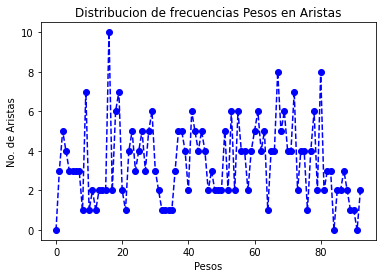

In [64]:
# print("Pesos_aristas: ")
print(pesos_aristas)

l2 = [0] * (max(pesos_aristas) + 1)
#lista vacia del numero de aristas que poseen
# cada valor de peso de aristas existente

for i in pesos_aristas:
  l2[i] += 1

#a cada peso de valor i se aumenta el contador
# si hay una arista con ese peso
print("Distribucion de pesos: ")
print(l2)

plt.plot(range(0,max(pesos_aristas)+1), l2, 'bo--')
plt.title("Distribucion de frecuencias Pesos en Aristas")
plt.ylabel("No. de Aristas")
plt.xlabel("Pesos")
plt.show()



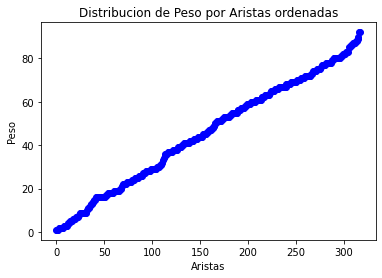

In [65]:
d_p_aristas = dict(zip(list(G.edges()),pesos_aristas))
#diccionario de (arista,peso)
d_p_aristas = {k: v for k, v in sorted(d_p_aristas.items(), key=lambda item: item[1])}
#reordenamiendo de menor a mayor por value

plt.plot(range(0, len(pesos_aristas)), list(d_p_aristas.values()), 'bo--')
plt.title("Distribucion de Peso por Aristas ordenadas")
plt.ylabel("Peso")
plt.xlabel("Aristas")
plt.show()


Detección de Comunidades con Girvan-Newman

In [66]:
codo = 125 #escogido por conveniencia viendo el grafico

In [67]:
### Filtro de aristas para aplicar G-N

umbral = d_p_aristas[list(d_p_aristas)[codo]] #umbral de filtro
print("Umbral de peso de corte = " + str(umbral))
# se determina de la grafica "Distribucion de Pesos en Aristas"
# para eliminar aristas que aportan poca info -> de poco peso

#se escoge umbral=20 por la gran cantidad de aristas con peso
# menor a 20

def filter_edge(n1, n2):
  arista_temp = Grafo_[n1][n2]
  if arista_temp['weight'] > umbral:
    return (n1, n2) 

"""
filter_edge es una funcion de filtro para aristas de un grafo

devuelve aquellas aristas (n1,n2) cuyo peso es mayor que umbral
"""

subgrafo_filter = nx.subgraph_view(Grafo_, filter_edge=filter_edge)
#subgraph_view permite extraer subgrafos de un grafo original con filtros

#Crear Subgrafo filtrado
subgrafo_ = nx.Graph()
subgrafo_.add_nodes_from(subgrafo_filter.nodes)
subgrafo_.add_edges_from(subgrafo_filter.edges)

Umbral de peso de corte = 38


In [68]:

###Deteccion de comunidades con Girvan-Newman

com = community.girvan_newman(subgrafo_)
a = list(com)
print('Niveles de Comunidades = ' + str(len(a)))
for i in range(25):
  print("Nivel "+ str(i))
  print(a[i])

Niveles de Comunidades = 25
Nivel 0
({0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}, {7}, {14})
Nivel 1
({0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26}, {17, 2, 21}, {7}, {14})
Nivel 2
({0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {7}, {14}, {23})
Nivel 3
({0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {7}, {12}, {14}, {23})
Nivel 4
({0, 1, 3, 4, 5, 6, 8, 9, 10, 13, 15, 16, 18, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {7}, {11}, {12}, {14}, {23})
Nivel 5
({0, 1, 3, 4, 5, 8, 9, 10, 13, 15, 16, 18, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {6}, {7}, {11}, {12}, {14}, {23})
Nivel 6
({0, 1, 3, 4, 5, 8, 9, 10, 13, 15, 16, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {6}, {7}, {11}, {12}, {14}, {18}, {23})
Nivel 7
({0}, {1, 3, 4, 5, 8, 9, 10, 13, 15, 16, 19, 20, 22, 24, 25, 26}, {17, 2, 21}, {6}, {7}, {11}, {12}, {14}, {18}, {23})
Nivel 8
({0}

Obtención de acomodo Spectral Layout

In [69]:
print(list(combinations([1,2,3,4,5],2)))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [70]:
L_novos_aristas = []
corte_comunidades = 16
s_G = nx.Graph()
s_G.add_nodes_from(Grafo_.nodes())

for comunidad in a[corte_comunidades]:
  
  n_aristas = list(combinations(comunidad,2))

  #data = False para eliminar pesos de aristas al copiar
  s_G.add_edges_from(n_aristas) #agregar aristas a nuevo grafo
  L_novos_aristas.append(n_aristas)

print(s_G.edges.data(data=True))

[(15, 16, {}), (15, 19, {}), (15, 20, {}), (15, 22, {}), (15, 24, {}), (15, 25, {}), (15, 26, {}), (16, 19, {}), (16, 20, {}), (16, 22, {}), (16, 24, {}), (16, 25, {}), (16, 26, {}), (17, 21, {}), (19, 20, {}), (19, 22, {}), (19, 24, {}), (19, 25, {}), (19, 26, {}), (20, 22, {}), (20, 24, {}), (20, 25, {}), (20, 26, {}), (22, 24, {}), (22, 25, {}), (22, 26, {}), (24, 25, {}), (24, 26, {}), (25, 26, {})]


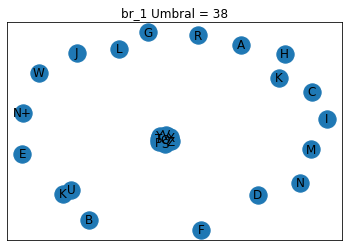

In [71]:
position_subgrafo_ = nx.spring_layout(s_G, weight=None, scale=1)

#Funcion para dibujar subgrafo con etiquetas

nx.draw_networkx(s_G, 
                pos = position_subgrafo_, with_labels = False)

nx.draw_networkx_labels(s_G, 
                        pos = position_subgrafo_,
                        labels= etiquetas)

#pos = posicion de nodos en plot

plt.title("br_1 Umbral = " + str(umbral))
plt.show()


In [72]:
#pos_grafo = nx.circular_layout(G) #posicion espacial de nodos
#puede ser con circular_layout o spectral_layout
pos_grafo = position_subgrafo_

output_notebook()

plot = Plot(plot_width=900, plot_height=500,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "br_1 Interaccion Slider"

datos_nodos = list(matriz_1['Unnamed: 1']) #datos nombre nodos

#Dibujar grafo 
graph_ = GraphRenderer()

# Nodos
graph_.node_renderer.data_source.add(nodos_grafo, 'index') #datos index nodos
graph_.node_renderer.glyph = Circle(size=15, fill_color='blue')

#Obtener datos para cada nodo
graph_.node_renderer.data_source.data['name'] = datos_nodos

# Aristas
graph_.edge_renderer.data_source.data = dict(
    start= nodos_inicio,
    end= nodos_destino) #definir datos de aristas
graph_.edge_renderer.data_source.add(pesos_aristas, "Weights")
graph_.edge_renderer.glyph = MultiLine(line_color="#CCCCCC",
                                       line_alpha=0.8,
                                       line_width=1)


#Herramientas para seleccionar y mostrar nodos
hover = HoverTool(tooltips=[("Nodo", "@name")])
plot.add_tools(hover, TapTool(), BoxSelectTool())


#Posicion espacial de nodos
graph_.layout_provider = StaticLayoutProvider(graph_layout = pos_grafo)
plot.renderers.append(graph_)

In [73]:
#Configuracion nodos y aristas en las interacciones

graph_.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_.node_renderer.glyph.properties_with_values()

graph_.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=3)
graph_.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

#Politica de seleccion e inspeccion de nodos
graph_.selection_policy = NodesAndLinkedEdges()
graph_.inspection_policy = NodesAndLinkedEdges()


In [74]:
# Slider
code = """
    
    var datos_nodos = datum;
    var f = cb_obj.value;
    var n_nodos_inicio = [];
    var n_nodos_destino = [];
    var n_pesos = [];
    var n_indices = [];

    var n1 = nodos_inicio_act.slice();
    var n2 = nodos_destino_act.slice();
    var p1 = pesos_actuales.slice();
    var limite = aristas;
    var index_ = indices_actuales;

    for (var i= 0; i < limite; i++) {
      if (p1[i] > f) {
        n_nodos_inicio.push(n1[i]);
        n_nodos_destino.push(n2[i]);
        n_pesos.push(p1[i]);
      }
    }

    var new_data_edge = {'start': n_nodos_inicio, 'end': n_nodos_destino};
    var new_data_nodes = {'index': index_};

    graph_setup.edge_renderer.data_source.data = new_data_edge; 
    graph_setup.node_renderer.data_source.data = new_data_nodes;
    graph_setup.node_renderer.data_source.data['name'] = datos_nodos;
    
"""
callback = CustomJS(args = dict(graph_setup = graph_,
                                datum = datos_nodos,
                                nodos_inicio_act = nodos_inicio,
                                nodos_destino_act = nodos_destino,
                                pesos_actuales = pesos_aristas,
                                aristas = no_aristas,
                                indices_actuales = nodos_grafo),
                                code = code)
slider = Slider(title = 'Umbral', start = 1, end = 100, value = 1)
slider.js_on_change('value', callback)

#Plotear grafo
layout = Column(plot, slider)
output_file("example_1.html")
output_notebook()
show(layout)

"""
Nota personal

si te manda error RuntimeError: Models must be owned by only a single document

Reinicia el entorno de ejecucion para borrar variables locales almacenadas 
por Python

Bokeh no admite que se compartan datos entre diferentes sesiones por seguridad.
Python si permite que en diferentes sesiones(ejecuciones) se guarden
variables locales, lo que no es compactible con Bokeh.

"""


'\nNota personal\n\nsi te manda error RuntimeError: Models must be owned by only a single document\n\nReinicia el entorno de ejecucion para borrar variables locales almacenadas \npor Python\n\nBokeh no admite que se compartan datos entre diferentes sesiones por seguridad.\nPython si permite que en diferentes sesiones(ejecuciones) se guarden\nvariables locales, lo que no es compactible con Bokeh.\n\n'